In [66]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import chess
from sarfa import core, BoardVisualization, SarfaBaseline, Engine, RemovalPerturber
from IPython.display import Image, display
from collections import defaultdict

# Visualization Testing

In [37]:
FEN = '6k1/2n1b1r1/r1q1p1p1/2p1PpNp/1pP2P1P/pP1RB3/P2Q2P1/3R2K1 w - - 0 1'
action = ''

In [39]:
board = chess.Board(FEN)
engine = Engine("./stockfish_15_x64_avx2")
board_visualization = BoardVisualization(board)


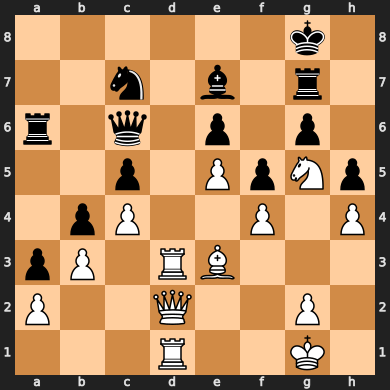

In [40]:
board_visualization.only_board()

# Sarfa (without defined action)

In [51]:
saliency_results: dict[str, float] = defaultdict(int)
perturber = RemovalPerturber(board)
saliency_calculator = SarfaBaseline(engine, board)
for perturbed_board, perturbed_position_str in perturber.process():

    saliency: float = saliency_calculator.compute(perturbed_board, None)
    saliency_results[perturbed_position_str] = saliency
    print(f"{perturbed_position_str} removed: {saliency}")

a2 removed - 0.3646346486749216
a3 removed - 0.5802140791588997
a6 removed - 0
b3 removed - 0.3744690929498245
b4 removed - 0
c4 removed - 0.35540242272862593
c5 removed - 0.5005726512072017
c6 removed - 0
c7 removed - 0
d1 removed - 0.45831849256706314
d2 removed - 0.3930379270412125
d3 removed - 0.3815729728786711
e3 removed - 0.4025561399961065
e5 removed - 0.3658498170434298
e6 removed - 0
e7 removed - 0.14078178548343606
f4 removed - 0.3220153153241188
f5 removed - 0.4850232856935319
g2 removed - 0.3810736622365124
g5 removed - 0.3712482647639054
g6 removed - 0.2305163780674371
g7 removed - 0.08186029658249247
h4 removed - 0.5541329566675769
h5 removed - 0.2336622691567632


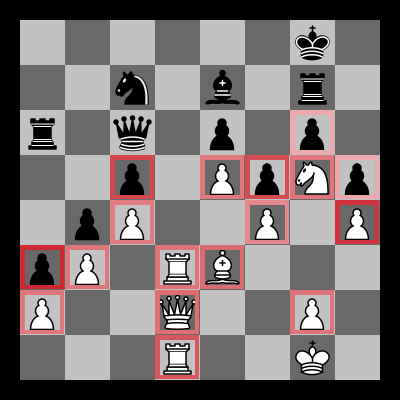

In [53]:
path = board_visualization.show_heatmap(saliency_results, None)
display(Image(path))

# Sarfa Baseline with Move

In [77]:
action: chess.Move = chess.Move.from_uci("e3f2")

In [83]:
saliency_results: dict[str, float] = defaultdict(int)
perturber = RemovalPerturber(board)
saliency_calculator = SarfaBaseline(engine, board)
for perturbed_board, perturbed_position_str in perturber.process():

    saliency: float = saliency_calculator.compute(perturbed_board, action)
    saliency_results[perturbed_position_str] = saliency


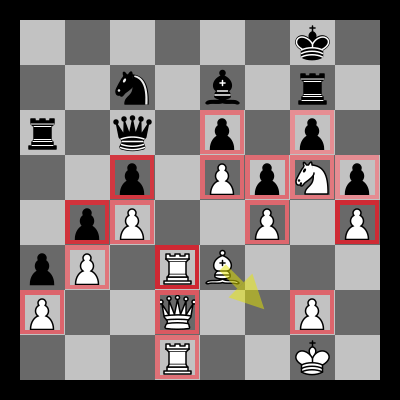

In [84]:
path = board_visualization.show_heatmap(saliency_results, action)
display(Image(path))

# Benchmarking